<center><h2>Graphene NanoRibbon - Zig Zag Structure</h2></center>

**Quick Summary**

We are interested in the edge modes of the Graphene Nano Ribbon. 
A nano ribbon is a 2D structure in which the molecules extend infinitely in one of 
the directions and finite in the other. One more visualizations of the above is forming a chain of 
atoms(Periodic boundary conditions) in one of the directions and finite 
chain(Open boundary conditions) in the other direction.

### Importing the required libraries

In [5]:
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import ipywidgets as ipy
plt.style.use('seaborn')
mp.rcParams['figure.figsize'] = (9, 7)
%matplotlib notebook

### Modules for building the model and computing the eigenenergies and values

In [29]:
def gzig_zag(N = 25, t = 1.0, kval = 0.5):
    Hmat = np.zeros([2*N,2*N], dtype = complex)
    for i in range(len(Hmat)-1):
        Hmat[i][i+1] = (1-i%2)*t*(1+np.exp(1j*kval)) + (i%2)*t #0.5*np.random.random()
        Hmat[i+1][i] = np.conj(Hmat[i][i+1])
        #Hmat[i][i] = np.random.random()
    return Hmat

def compute(Hmat):
    eigenenergies, eigenstate = np.linalg.eigh(Hmat)
    return eigenenergies, eigenstate

### Energy spectrum as a function of 'k'

<IPython.core.display.Javascript object>


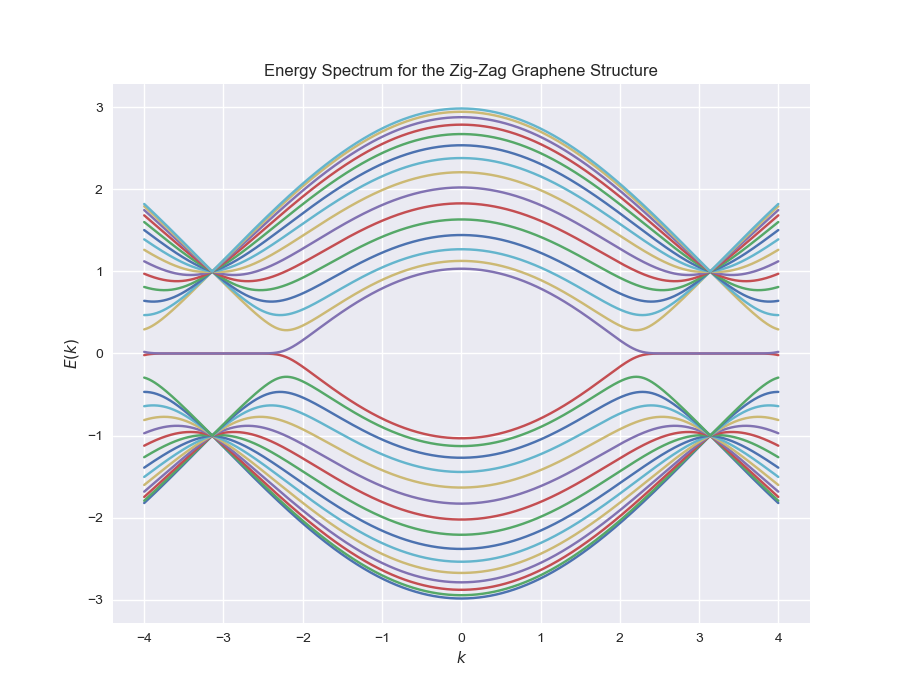

In [30]:
N = 15; t = 1.0
k = np.linspace(-4,4,1001)
eig = np.zeros([len(k),2*N])
for _ in range(len(k)):
    eig[_] = compute(gzig_zag(N,t,k[_]))[0]
plt.figure()
plt.plot(k,eig)
plt.xlabel("$k$"); plt.ylabel("$E(k)$")
plt.title("Energy Spectrum for the Zig-Zag Graphene Structure")
plt.show()

### Visualization of the Edge modes

<IPython.core.display.Javascript object>


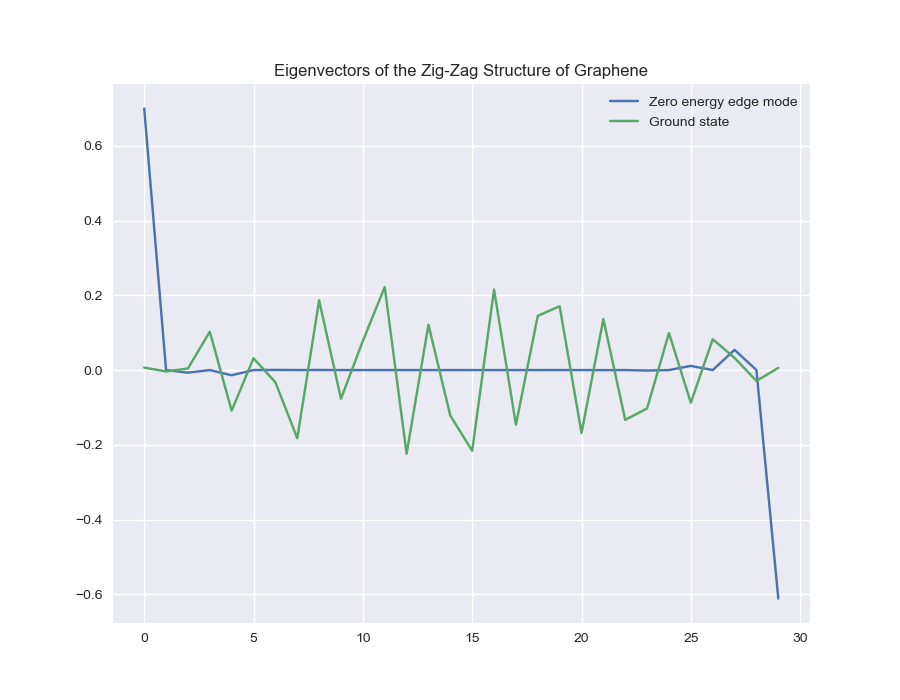

In [31]:
vecs = np.zeros([2*N,2*N], dtype = complex)
vecs = compute(gzig_zag(N,t,-3))[1]
plt.figure()
plt.plot(range(2*N),vecs[:,N], label="Zero energy edge mode")
plt.plot(range(2*N),vecs[:,0], label="Ground state")
plt.title("Eigenvectors of the Zig-Zag Structure of Graphene")
plt.legend()
plt.show()

### Checking the Robustness of the edge modes

In [56]:
def gzig_zag_r(N = 25, t = 1.0, kval = 0.5):
    Hmat = np.zeros([2*N,2*N], dtype = complex)
    for i in range(len(Hmat)-1):
        Hmat[i][i+1] = (1-i%2)*(t-np.random.random())*(1+np.exp(1j*kval)) + (i%2)*(t+np.random.random()) #0.5*np.random.random()
        Hmat[i+1][i] = np.conj(Hmat[i][i+1])
        #Hmat[i][i] = np.random.random()
    return Hmat

<IPython.core.display.Javascript object>


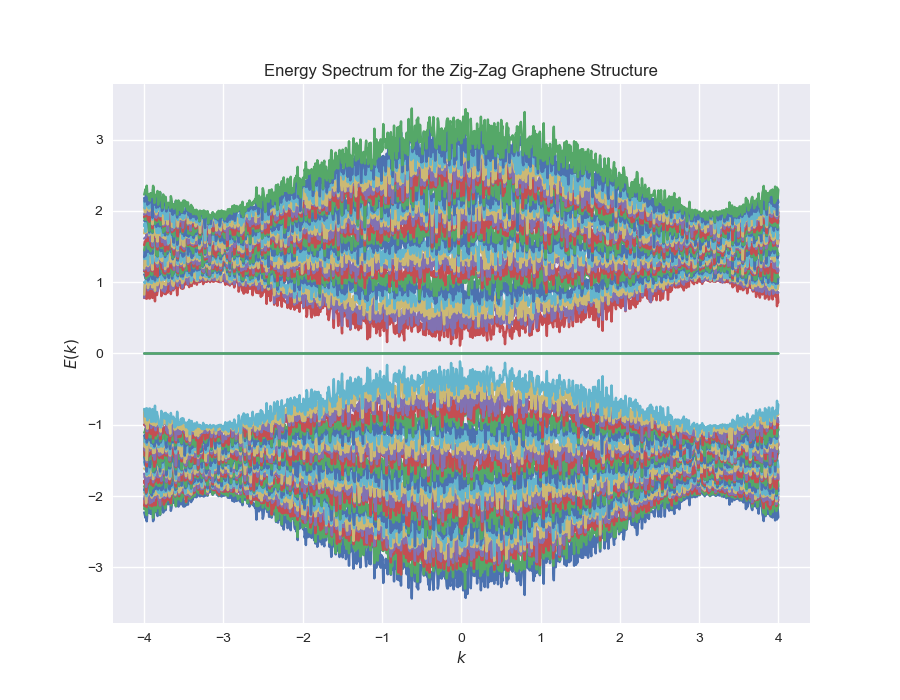

In [57]:
plt.figure()
N = 25; t = 1.0
k = np.linspace(-4,4,1001)
eig = np.zeros([len(k),2*N])
for _ in range(len(k)):
    eig[_] = compute(gzig_zag_r(N,t,k[_]))[0]
plt.plot(k,eig)
plt.xlabel("$k$"); plt.ylabel("$E(k)$")
plt.title("Energy Spectrum for the Zig-Zag Graphene Structure")
plt.show()

<IPython.core.display.Javascript object>


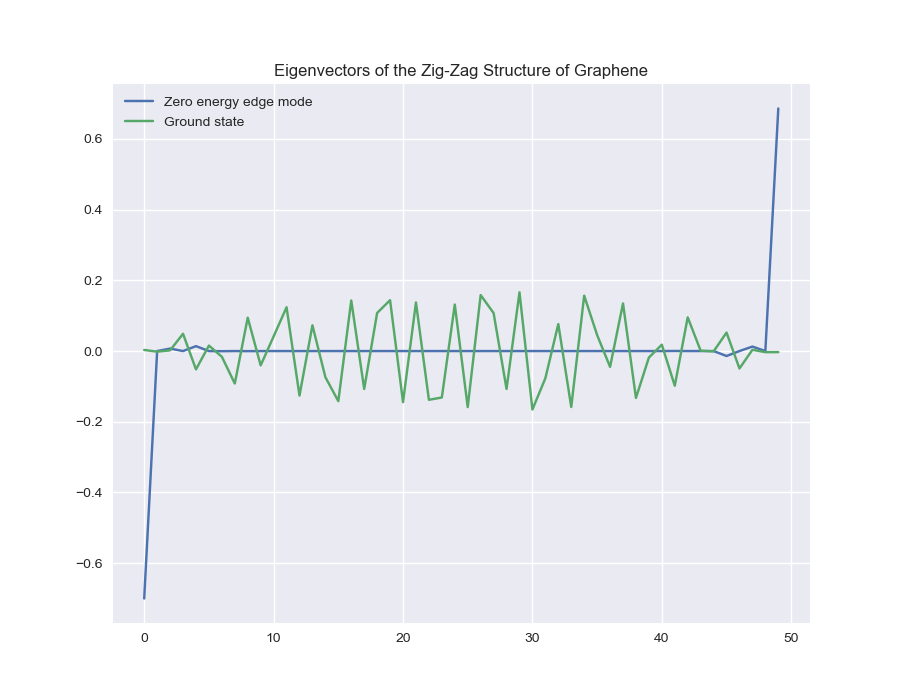

In [55]:
plt.figure()
vecs = np.zeros([2*N,2*N], dtype = complex)
vecs = compute(gzig_zag_r(N,t,-3))[1]
plt.plot(range(2*N),vecs[:,N-1], label="Zero energy edge mode")
plt.plot(range(2*N),vecs[:,0], label="Ground state")
plt.title("Eigenvectors of the Zig-Zag Structure of Graphene")
plt.legend()
plt.show()